<a href="https://colab.research.google.com/github/m-dergacheva/Yandex-Practicum_DA/blob/main/Yandex_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%80%D1%8B%D0%BD%D0%BA%D0%B0_%D0%B2%D0%B8%D0%B4%D0%B5%D0%BE%D0%B8%D0%B3%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ_рынка_видеоигр

## Описание проекта, цели, задачи

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Имеются данные до 2016 года. Для целей исследования предполагается, что сейчас декабрь 2016 г., и планируется кампания на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируется ли  продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [ ]:
#импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import scipy.stats as st
import numpy as np
from datetime import datetime
import numpy as np

In [ ]:
# из библиотеки google.colab импортируем класс files
from google.colab import files
# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving games.csv to games.csv


In [ ]:
#открытие и запись файл
try:
    data=pd.read_csv('/content/games.csv')
except:
    data=pd.read_csv('C:/Users/Рита/Desktop/Yandex/games.csv')
    #ниже добавлена ссылка для моей локальной работы

## Шаг 2. Подготовка данных

In [ ]:
#первый просмотр сета данных
def first_look (data):
    print('Первые 10 строк')
    display(data.head(10))
    print('Типы данных\n')
    display(data.info())
    print('Статистика.Сводка')
    display(data.describe())
    print('Пропуски:\n')
    display(data.isna().sum())
    print('\n Процент пропусков')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('\nДубликаты:\n')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [ ]:
first_look (data)

Первые 10 строк


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Статистика.Сводка


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Пропуски:



Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


 Процент пропусков


Critic_Score       51.319174
Rating             40.478612
User_Score         40.089740
Year_of_Release     1.609333
Name                0.011965
Genre               0.011965
Platform            0.000000
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
dtype: float64


Дубликаты:

Дубликатов НЕТ


В данных отсутствуют явные дубликаты. Больше всего пропусков данных в critic score, rating, user_score. Из-за присутствия пропусков в данных, например, в year_of_release, данные представлены в формате float. В дальнейшем возможно это скорректировать.

### Предобработка данных

In [ ]:
#перевод в нижний регистр название столбцов
data.columns = [x.lower().replace(' ', '_') for x in data.columns.values]
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
#создаем копию data, с целью определить объем потерянных данных до/после преобразований
temp=data.copy()

Явных дубликатов в данных не обнаружено. При этом предлагается проанализировать данные на предмет неявных дубликатов (например, по названию, году и платформе, т.к. при анализе только по названию и году, могут быть отображены те игры, которые были разработаны и выпущены сразу на несколько платфоормах).

In [ ]:
#поиск неявных дубликатов
data[data.duplicated(subset=['name', 'year_of_release','platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Обнаружены дубликаты по 1 игре. Строки 604 и 16230 содержат противоречивую информацию об одной игре в части касающихся данныз о продажах. Во избежание дальнейших ошибок, данные об этой игре предлагается удалить.

In [ ]:
#удаляем ненужные строки
data=data.drop([604,16230]).reset_index(drop=True)

In [ ]:
#вывод кол-ва пропусков в строке name
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
658,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14243,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Выявлено, что в строках с пропущенными значениями name, отсутсвуют значения genre, critic_score,user_score, rating. Поиск таких игр в сети Интернет представляется невозможным. Такие строки предлагается удалить.

In [ ]:
#удаление строк
data = data.dropna(subset=['name']).reset_index(drop=True)

#### Обработка year_of_release

Выявлено, что в названиях (колонка data['name']) иногда содержатся данные о выходе игры. Предлагается возможные пропуски в колонке data['year_of_release'] заполнить такими данными.

In [ ]:
#вывод минимального года выпуска игр в сете
data['year_of_release'].min()

1980.0

In [ ]:
#вычленение цифр из названий и преобразование таких цифр в формат float (потому что в данных будут также Nan)
data['num']=data["name"].str.extract(r"\b(\d+)\b")
data['num']=data['num'].astype('float')

#вывод строк, в которых отсутсвуют значения года выхода, но есть "вычленные" данные о годе из названия
display(data.loc[(data['year_of_release'].isna())&(data['num']>1980),'num'])

_=data.loc[(data['year_of_release'].isna())&(data['num']>1980),'num'].count()

display(f'Количество игр, по которым возможно восстановить значение года выхода: {_}')

183      2004.0
377      2004.0
475      2006.0
1648     2003.0
2570     2009.0
3484     2002.0
4773     2003.0
5154     2003.0
5334     2013.0
5653     2005.0
5887     2003.0
8916     2005.0
13193    2011.0
13927    2006.0
15950    2008.0
16076    2007.0
16369    2008.0
Name: num, dtype: float64

'Количество игр, по которым возможно восстановить значение года выхода: 17'

In [ ]:
#заполняем пропуски новыми значениями при отстутствии необходимой информации
for i in data['name'].unique():
    data.loc[(data['name']==i)&(data['year_of_release'].isna())& (~data['num'].isna())& (data['num']>1980), 'year_of_release']=\
data.loc[(data['name']==i)&(data['year_of_release'].isna())& (~data['num'].isna())& (data['num']>1980), 'num']

#и удаляем теперь ненужную колонку num
data = data.drop(columns=['num'])

# удаляем строки с пропусками данных в столбце year_of_release
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

#перевод дат в формат int
data['year_of_release']=data['year_of_release'].astype('int')
#вывод результата
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Для оставшихся игр найти данные о годах релиза возможно в случае исследования каждой такой игры. В рамках данной работы такие действия представляются нецелесообразным. Строки с неизвестными годами выпуска предлагается удалить (их кол-во 252).

In [ ]:
# сравнение кол-во данных до и после преобразования в колонке year_of_release
data['year_of_release'].isna().sum()

0

In [ ]:
# сравнение объемов данных до и после преобразования
a, b = len(data), len(temp)
print(len(data), len(temp), round((a-b)/a*100, 2))

16459 16715 -1.56


#### Обработка user_score

Для дальнейшего преобразования для значений рейтингов необходимо учесть следующее:  
  По данным Интернета значение tbd (в данных user_score) означает to be determined (т.е. пока не определен). Такие значения предлагается оставить как "Nan", чтобы в дальнейшем возможно было бы анализировать имеющиеся значения.   

In [ ]:
# производим замену 'tbd' на NaN
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score']=data['user_score'].astype('float')

#### Обработка critic_score и rating

"ESRB (Entertainment Software Rating Board) – негосударственная организация, которая создала систему игровых рейтингов.  
Есть несколько основных возрастных рейтингов: американская ESRB, европейская PEGI, немецкая USK, японская CERO, российская RARS, а также еще несколько региональных организаций. Отличаются они, очевидно, регионами применения и особенностями работы.
В случае ESRB, издатель заключает договор с организацией, который содержит меры контроля над соответствием контента и рекламы игры ее присвоенному рейтингу."  
Источник: https://dtf.ru/gamedev/265535-vozrastnoj-rejting-i-kak-ego-poluchit  

Таким образом, предполагается, что восстановить рейтинг игр с учетом такой классификации невозможно по ряду причин:
1. Не все игры, представленные в сете произведены в США или Канаде (указанный рейтинг американского происхождения)
2. Не все производители игр имели(ют) возможность участвовать в таком рейтинге

В данной связи, предлагается пропуски заполнить значением unknown.

In [ ]:
# замена пропущенных значений в столбце 'rating' на строку 'unknown'
data['rating'] = data['rating'].fillna('unknown')

Для поиск возможностей заполнения пропущенных значений в critic_score, предлагается определить с каким параметром данный показатель может коррелировать.

In [ ]:
#создание столбца с суммарными продажами игр
data['sum_sales']=data.loc[:,['na_sales','eu_sales','jp_sales','other_sales']].sum(axis= 1 )
#data.head()

In [ ]:
#вывод таблицы корреляции
data.corr()

<ipython-input-20-8a0774cddb6e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.092581,0.003933,-0.168384,0.037585,0.010246,-0.267906,-0.076397
na_sales,-0.092581,1.000000,0.765832,0.450788,0.638794,0.240588,0.086034,0.941150
eu_sales,0.003933,0.765832,1.000000,0.435541,0.722636,0.221467,0.055103,0.901394
jp_sales,-0.168384,0.450788,0.435541,1.000000,0.291312,0.153267,0.126046,0.612988
other_sales,0.037585,0.638794,0.722636,0.291312,1.000000,0.198903,0.056982,0.749182
critic_score,0.010246,0.240588,0.221467,0.153267,0.198903,1.000000,0.580118,0.245769
user_score,-0.267906,0.086034,0.055103,0.126046,0.056982,0.580118,1.000000,0.088049
sum_sales,-0.076397,0.941150,0.901394,0.612988,0.749182,0.245769,0.088049,1.000000


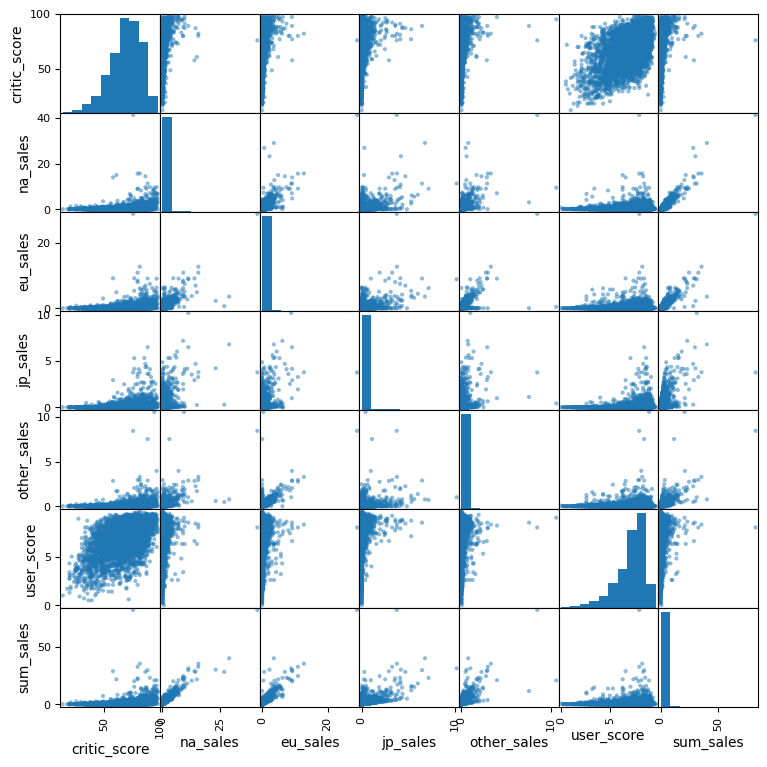

In [ ]:
pd.plotting.scatter_matrix(data[['critic_score', 'na_sales','eu_sales','jp_sales','other_sales','user_score','sum_sales']],figsize=(9,9));

Из таблицы выше очевидно, что ни один из представленных показателей не имеет сильное влияение/связь с исследуемым параметром. В данной связи, заполнить пропуски в данных не представляется возможным.

In [ ]:
# сравнение объемов данных до и после преобразования
a, b = len(data), len(temp)
print(len(data), len(temp), round((a-b)/a*100, 2))

16459 16715 -1.56


После обработки данных, потеря данных составила менее 2 процентов.

### Вывод  
Наибольшая доля пропущенных значений были выявлены в critic_Score (51.319174)?rating (40.478612),user_Score (40.089740), year_of_Release (1.609333).  Данные в годах выпуска игр получилось частично восстановить из названий игр. Данные в user_score были обработаны (значения tbd были определены как "to be determinated" и были заменены на nan в целях дальнейшего анализа). Данные в rating были заменены на unknown, по причине отсутствия данных, "неуниверсальности" указанного рейтинга (в разных странах существует свой рейтинг, более того, как указано в сети Интернет, этот рейтинг не является обязательным для всех игр и восстановить такие значения невозможно).  
Отсутствие значений/пропуски могут быть обоснованы как отсутствием некоторых рейтингов/подсчетов голосов и прочее в год создания игры (минимальное значение по году выпуска игр составил 1980 г.), а также возможным только начавшимся процессом анализа (рейтингов в т.ч.) по играм (в данной связи были указаны значения tbd).


## Шаг 3. Исследовательский анализ данных

#### Сколько игр выпускалось в разные годы?

In [ ]:
product_games_year=data.pivot_table(index='year_of_release', values='name', aggfunc='count')
product_games_year.columns=['count_game']
#display(product_games_year.head())

In [ ]:
#выводим график по созданной сводной таблице
fig = px.line(product_games_year, y='count_game',
             x=product_games_year.index)

fig.update_layout(title='Распределение выпуска игр по годам',
                 height=400, width=1000,
                 xaxis_title="Года",
                yaxis_title="Количество выпусков")


fig.show()

Исходя из графика, основной пик производства игр пришелся на 2008-2009гг. При этом очевидно, данные до 2000 г. показывают минимальные значения. Таким образом, для анализа данных предлагается учитывать, что данные как минимум до 2000 г. не оказываются значительное влияние на дальнейшее исследование (не представляют ценности в рамках ислледования).  
Для подтверждения этого предположения, предлагается проанализировать количество проданных копий игр по годам.

In [ ]:
#сводная таблица по продажам копий игр по годам
global_sales=data.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
#global_sales.head()

In [ ]:
#выводим график по созданной сводной таблице
fig = px.line(global_sales, y='sum_sales',
             x=global_sales.index)

fig.update_layout(title='Распределение продаж копий игр по годам',
                 height=400, width=1000,
                 xaxis_title="Года",
                yaxis_title="Объем продаж копий игр")


fig.show()

In [ ]:
#сравнение графиков выпусков и продаж копий игр
fig = go.Figure()
fig.add_trace(go.Scatter(x=product_games_year.index, y=product_games_year['count_game'],
                    mode='lines',
                    name='Выпуск игр по годам'))

fig.add_trace(go.Scatter(x=global_sales.index, y=global_sales['sum_sales'],
                    mode='lines+markers',
                    name='Продажи игр по годам'))

fig.update_layout(title='Распределение выпуска и продаж игр по годам',
                 height=500, width=1000,
                 xaxis_title="Года",
                yaxis_title="Количество продаж/выпусков игр")

fig.show()

Аналогично выводу полученному выше, объем проданный копий игр активно рос после 2000 г. Заметен небольшой подъем в 1999 и 1998 гг., однако он же сменяется на спад в 2000 г.  

Графики по объемам продаж и выпуска игр практически индентичны. Т.е. явный подъем наблюдается после 2000г. При этом пиковые значения приходятся на 2008-2009гг. Однако уже после 2011 г. показатели и продаж и выпуска резко снижаются, и показатель по продажам в 2016 г. приближается к уровням периода до 2000г. На данный момент, не представляется возможным точно предположить причину такого спада.

Предлагается оценить, в каких регионах лучше всего продавались игры по годам.

In [ ]:
#построение сводной таблицы продаж игр по годам по регионам
region_sales=data.groupby('year_of_release', as_index=False) \
    .agg({'na_sales':'sum',
         'eu_sales':'sum',
         'jp_sales':'sum',
         'other_sales':'sum',
         'sum_sales':'sum'})
region_sales.head()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,sum_sales
0,1980,10.59,0.67,0.00,0.12,11.38
1,1981,33.40,1.96,0.00,0.32,35.68
2,1982,26.92,1.65,0.00,0.31,28.88
3,1983,7.76,0.80,8.10,0.14,16.80
4,1984,33.28,2.10,14.27,0.70,50.35


In [ ]:
#выводим график по созданной сводной таблице
fig = px.bar(region_sales, y=['na_sales','eu_sales','jp_sales','other_sales'],
             x='year_of_release')

fig.update_layout(title='Распределение продаж игр по годам и по регионам',
                 height=800, width=1000,
                 xaxis_title="Года",
                yaxis_title="Объем продаж")


fig.show()

Исходя из графика, представляется аргументированным в дальнейшем рассматривать период после 2000 г. Данное "усечение" скорее всего будет скорректировано. Так как отсечение от 2000г. в целом соответствует историческому периоду развитию рынка игровой индустрии и появлению большего кол-ва платформ и игр на них соответственно. При этом необходимо обратить внимание, что самым "экономически привлекательным" регионом является Северная Америка, относительно других регионов, продажи в этом регионе практически всегда были выше, чем в других регионах.

Предлагается рассмотреть продажи игр в зависимости от плафторм.

In [ ]:
#построение сводной таблицы продаж игр по годам по платформам по регионам
platform_sales_region=data.groupby(by=['year_of_release','platform'], as_index=False) \
    .agg({'na_sales':'sum',
         'eu_sales':'sum',
         'jp_sales':'sum',
         'other_sales':'sum',
         'sum_sales':'sum'})
#platform_sales_region.head()

In [ ]:
#построение сводной таблицы выпуска игр по годам по платформам
platform_sales=data.groupby(by=['year_of_release','platform'], as_index=False) \
    .agg({'name':'count'})
#platform_sales.head()

In [ ]:
#выводим график по созданной сводной таблице
fig = px.bar(platform_sales, y='name',
             x='year_of_release', color='platform')

fig.update_layout(title='Распределение выпуска игр по годам по платформам',
                 height=400, width=1000,
                 xaxis_title="Года",
                yaxis_title="Количество выпусков")


fig.show()

Представленные данные иллюстрируют прежде всего, что данные сильно подтверждены фактору жизненного цикла платформ (т.е. как только выходила платформа, например, PS, производители игр в основном делали игры на такой платформе, далее появлялась новая платформа PS2 производители "переключались" на производство игр на новую платформу).

In [ ]:
#создание таблицы с суммарными продажами игр по платформам
max_sales_platform=data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
#max_sales_platform.head()

In [ ]:
#выводим график по созданной сводной таблице
fig = px.bar(max_sales_platform, y='sum_sales',
             x=max_sales_platform.index)

fig.update_layout(title='Распределение продаж копий игр по платформам',
                 height=400, width=1000,
                 xaxis_title="Платформы",
                yaxis_title="Объем продаж копий игр")


fig.show()

Очевидны лидеры по объемам продаж игр за весь представленный пеориод PS2, X360, PS3, Wii,DS, PS.  
С учетом вышеизложенного тезиса об устаревании одних платформ и появлении новых, предлагается проанализировать динамику продаж копий игр по платформам, значения продаж которых были выше медианных значений по годам.

In [ ]:
#создание сводной таблицы с суммарным и медианными продажами по годам
median_sales_game=data.pivot_table(index=['year_of_release','platform'],
                     values='sum_sales',
                     aggfunc=['sum','median']).reset_index(drop=False)
median_sales_game.columns=['year_of_release','platform','sum_sales','median_sales']
#median_sales_game.head(15)

#отсечение продаж по медианному порогу
clear_median_sales_game=median_sales_game.query('sum_sales>median_sales')
#clear_median_sales_game.tail(15)

In [ ]:
#выводим график по созданной сводной таблице
fig = px.line(clear_median_sales_game, y='sum_sales',
             x='year_of_release', color='platform')

fig.update_layout(title='Распределение продаж копий игр по годам платформам, которые показали продажи игр выше медианных значений',
                 height=400, width=1000,
                 xaxis_title="Года",
                yaxis_title="Объем продаж копий игр")


fig.show()

Исходя из графика выше, очевидными лидерами, оказались PS (с пиком в 1998 г.), PS2 (пик в 2004 г.), Wii (пик в 2009 г.), X360 (пик в 2010 г.), PS3 (пик в 2011 г.) и PS4 (2015 г.) В целом, результаты совпадают с показателями предыдущего графика, иллюстрирующего суммарные продажи по всем годам). При этом разрывы, пики и "рваные" графики показывают явное наличие жизненных циклов платформ.

#### Сколько лет актуальна платформа? Какие платформы могут считаться актуальным?

In [ ]:
#вывод сводной таблицы по началу и концу ЖЦ платформам
life_cycle_platform=data.pivot_table(index=['platform'], values='year_of_release',
                                    aggfunc=['min','max']).reset_index(drop=False)
life_cycle_platform.columns=['platform','first_year','last_year']

life_cycle_platform['life_cycle']=(life_cycle_platform['last_year']-life_cycle_platform['first_year'])
life_cycle_platform=life_cycle_platform.sort_values(by='life_cycle', ascending=False)
#life_cycle_platform

In [ ]:
#выводим график по созданной сводной таблице
fig = px.bar(life_cycle_platform, y='life_cycle',
             x='platform', color='platform')

fig.update_layout(title='Иллюстрация жизненных циклов по платформам',
                 height=400, width=1000,
                 xaxis_title="Платформы",
                yaxis_title="Года")


fig.show()

In [ ]:
#вывод графика жизненного цикла платформ
fig = px.box(life_cycle_platform, y="life_cycle")

fig.update_layout(title='Иллюстрация жизненных циклов платформ',
                 height=400, width=500,
                 xaxis_title="Жизненный цикл",
                yaxis_title="Года")


fig.show()

Таким образом, медианное значение жизненного цикла платформ составляет 6 лет. Выбросы принаждлежат платформам PC и DS.  С учетом ранее представленных данных о пиках популярности игр на разных платформах, такой лидер как PS2, например,  можно считать технически устаревшей платформой. Для целей исследования, для возможности построения прогнозов для 2017 года, вероятнее следует ориентироваться на срок 3 года, и, таким образом, "неявные" платформы, которые не попали в ТОП по продажам, как PS4 или XOne также попадут в анализ. Следовательно, для прогнозирования показателей получится охватить платформы находящиеся как в "середине" своего ЖЦ, так и на "начале" ЖЦ.  
Иными словами, необходимо учесть платформы за последние 3 года.

In [ ]:
#создание очищенной от устаревших платформ данных
clr_data_platform=data.query('year_of_release>2013')
#clr_data_platform.head()

In [ ]:
#создание сводной таблицы по продажам игр по актуальным платформам
median_sales_clr_data_platform=clr_data_platform.pivot_table(index=['year_of_release','platform'],
                    values='sum_sales', aggfunc=['sum','median']).reset_index(drop=False)
median_sales_clr_data_platform.columns=['year_of_release','platform','sum_sales','median_sales']
#median_sales_clr_data_platform.head()

In [ ]:
#вывод графика по созданной сводной таблице
fig = px.line(median_sales_clr_data_platform, y='sum_sales',
             x='year_of_release', color='platform')

fig.update_layout(title='Распределение продаж копий игр по годам на актуальных платформах',
                 height=400, width=800,
                 xaxis_title="Года",
                yaxis_title="Объем продаж копий игр")


fig.show()

Очевидны лидеры по продажам среди платформ, а именно: PS4, 3DS, XOne. При этом, интересно также анализировать платформы в связке с их ЖЦ (т.е. предшественников PS4 была PS3 и т.д.) И, вероятно, на результаты также повлияли продажи игр, которые "перекочевали" с одной платформы на другие.

In [ ]:
#вывод графика продаж по актуальным платформам
fig = px.box(clr_data_platform, y="sum_sales",x='platform', color='platform')

fig.update_layout(title='Суммарные продажи по актуальным платформам',
                 height=400, width=800,
                 xaxis_title="Плафтормы",
                yaxis_title="Объем продаж")


fig.show()

Исходя из графиков, видно, что лидерами среди актуальных платформ, по продажам за весь период, являются PS4, 3DS и XOne. При этом исходя из графика с разбивкой на временные промежутки, очевидно, что платформа PS3 постепенно "изживает" себя, тем более что на смену ей - более новая платформа PS4, продажи игр на которую уже достигли и перешли пик, но все ещё она остается актуальной платформой, с учетом выявленного ЖЦ платформ. Платформа XOne хоть и не является лидером по продажам, однако также является достаточно новой платформой, и продажи ещё могут увеличиться, в отличии от X360, чей жизненный цикл подходит к завершению и продажи игр на этой платформе падают.  
Исходя из представленных графиков, предлагается проанализировать игры на платформах PS3 (как предшественник PS4) и PS4, X360 (как предшественника XOne) и XOne, PC (платформа, которая хоть и не показывает максимальные продажи, но которая не подтвержена тезису о ЖЦ платформы, т.к. платформа не меняется, а совершенствуется и продажи на этой платформе стабильно есть), а также 3DS, как "потомок" DS, платформы, которая показала высокий уровень ЖЦ, после PC, и которая также способна проносить прибыль.

#### Исследование платформ PS3, PS4, X360, XOne, PC, 3DS

In [ ]:
#срез популярных платформ
pop_plat=['PS3','PS4','X360','XOne','PC','3DS']
popular_platform_data=clr_data_platform.query('platform in @pop_plat')
#popular_platform_data.head()

Предлагается проанализировать, какие жанры на популярных платформах показали наибольшие продажи.

In [ ]:
#сводная таблица по продажам на популряных платформах по жанрам
#genre_pop_platform=popular_platform_data.pivot_table(index=['platform','genre'], values='sum_sales',aggfunc='sum')
#genre_pop_platform=genre_pop_platform.reset_index(drop=False)
#genre_pop_platform

In [ ]:
#сводная таблица по продажам на популряных платформах по жанрам (медианное значение)
median_genre_pop_platform=clr_data_platform.pivot_table(index=['platform','genre'], values='sum_sales',aggfunc='median')
median_genre_pop_platform=median_genre_pop_platform.reset_index(drop=False)
#median_genre_pop_platform

In [ ]:
#сводная таблица по продажам на популряных платформах по жанрам (суммарное значение)
sum_genre_pop_platform=clr_data_platform.pivot_table(index=['platform','genre'], values='sum_sales',aggfunc='sum')
sum_genre_pop_platform=sum_genre_pop_platform.reset_index(drop=False)
#sum_genre_pop_platform

In [ ]:
#выводим график по созданной сводной таблице
fig = px.bar(sum_genre_pop_platform, y='genre',
             x='sum_sales', color='platform', barmode='group')

fig.update_layout(title='Популярные жанры игр для актуальных платформ',
                 height=800, width=1000,
                 xaxis_title="Продажи",
                yaxis_title="Жанры")


fig.show()

In [ ]:
#выводим график по созданной сводной таблице
fig = px.bar(median_genre_pop_platform, y='genre',
             x='sum_sales',barmode='group',color='platform',)

fig.update_layout(title='Популярные жанры игр для актуальных платформ',
                 height=800, width=1000,
                 xaxis_title="Продажи",
                yaxis_title="Жанры")


fig.show()

In [ ]:
#сводная таблица по продажам на популряных платформах по жанрам (медианное значение)
median_genre_sales=clr_data_platform.pivot_table(index='genre', values='sum_sales',aggfunc='median')
median_genre_sales=median_genre_sales.reset_index(drop=False).sort_values(by='sum_sales', ascending=False)
#median_genre_sales

In [ ]:
#выводим график по созданной сводной таблице
fig = px.bar(median_genre_sales, x='genre',y='sum_sales')

fig.update_layout(title='Продажи игр (медианные значения) по жанрам',
                 height=400, width=1000,
                 xaxis_title="Жанры",
                yaxis_title="Продажи")


fig.show()

In [ ]:
#сводная таблица по продажам на популряных платформах по жанрам (суммарное значение)
sum_genre_sales=clr_data_platform.pivot_table(index='genre', values='sum_sales',aggfunc='sum')
sum_genre_sales=sum_genre_sales.reset_index(drop=False).sort_values(by='sum_sales', ascending=False)
#sum_genre_sales

In [ ]:
#выводим график по созданной сводной таблице
fig = px.bar(sum_genre_sales, x='genre',
             y='sum_sales', barmode='group')

fig.update_layout(title='Суммарные продажи игр по жанрам',
                 height=400, width=1000,
                 xaxis_title="Жанры",
                yaxis_title="Продажи")


fig.show()

Как видно из графика, самым продаваемым жанром, по суммарным продажам, оказался жанр Action практически у всех платформ. На 2ом месте Shooter, на 3 -Sports. Жанр Role-Playing оказался популярным на платформе 3DS. Последний тезис явно связан с возможностями самой платформы.  
При анализе медианных значений продаж, жанр Shooter является лидером, на 2ом - Sports, на 3-Platform. Вероятно на данные результаты сильно влияет кол-во игр по жанрам и эффект "хитов" среди игр.

In [ ]:
#сводная таблица по выпускам на популряных платформах по жанрам (медианное значение)
count_name_genre_pop_platform=clr_data_platform.pivot_table(index=['platform','genre'], values='name',aggfunc='count')
count_name_genre_pop_platform=count_name_genre_pop_platform.reset_index(drop=False).sort_values(by='name', ascending=False)
#count_name_genre_pop_platform

In [ ]:
#сводная таблица по выпускам на популряных платформах по жанрам (медианное значение)
genre_count_name_genre_pop_platform=clr_data_platform.pivot_table(index='genre', values='name',aggfunc='count')
genre_count_name_genre_pop_platform=genre_count_name_genre_pop_platform.reset_index(drop=False).sort_values(by='name', ascending=False)
#genre_count_name_genre_pop_platform

In [ ]:
#выводим график по созданной сводной таблице
fig = px.bar(genre_count_name_genre_pop_platform, x='genre',y='name')

fig.update_layout(title='Выпуск игр по жанрам',
                 height=400, width=1000,
                 xaxis_title="Жанры",
                yaxis_title="Кол-во выпусков игр")


fig.show()

In [ ]:
#выводим график по созданной сводной таблице
fig = px.bar(count_name_genre_pop_platform, y='name',
             x='genre',barmode='group',color='platform',)

fig.update_layout(title='Выпуск игр по жанрам с разбивкой на платформы',
                 height=500, width=1000,
                 xaxis_title="Жанры",
                yaxis_title="Кол-во выпусков игр")


fig.show()

На суммарные продажи игр сильно повлияло количество выпусков таких игр. Несмотря на лидерство жанра Action по суммарным продажам, игры такого жанра больше всего выпускались. При этом лидер по медианным значениям продаж, жанр Shooter, всего лишь на 5 месте по кол-ву выпусков игр такого жанра.  
Однако стоит отметить, что все-таки оба жанра по суммарным продажам занимают 1 и 2 места, возможно предположить, что именно эти жанры больше всего пользуются популярностью у потребителей.

Предлагается рассмотреть, каким образом связаны оценки критиков и пользователей с продажами на каждой платформе.

In [ ]:
#создание срезов по платформам индивидуально
ps3_plat=popular_platform_data.query('platform== "PS3"')
ps4_plat=popular_platform_data.query('platform== "PS4"')
X360_plat=popular_platform_data.query('platform== "X360"')
XOne_plat=popular_platform_data.query('platform== "XOne"')
PC_plat=popular_platform_data.query('platform== "PC"')
plat_3DS=popular_platform_data.query('platform== "3DS"')

In [ ]:
#вывод графиков корреляции оценки критиков на продажи
fig =px.scatter(popular_platform_data, x="critic_score", y="sum_sales", facet_col="platform", color='platform')

fig.update_layout(title='Отношение оценки критиков и продаж по платформам',
                 height=400, width=1000,
                yaxis_title="Продажи")


fig.show()

In [ ]:
#вывод графиков корреляции оценки критиков на продажи
fig =px.scatter(popular_platform_data, x="user_score", y="sum_sales", facet_col="platform", color='platform')

fig.update_layout(title='Отношение оценки пользователей и продаж по платформам',
                 height=400, width=1000,
                yaxis_title="Продажи")


fig.show()

In [ ]:
#подсчет коэффициентов корреляции
for i in popular_platform_data['platform'].unique():
    print('Платформа: ',i)
    print('Коэффициент корреляции продаж и оценки критиков:',round(popular_platform_data.loc[(popular_platform_data['platform']==i), 'sum_sales'].corr(popular_platform_data.loc[(popular_platform_data['platform']==i),'critic_score']),3))
    print('Коэффициент корреляции продаж и оценки пользователей:',round(popular_platform_data.loc[(popular_platform_data['platform']==i), 'sum_sales'].corr(popular_platform_data.loc[(popular_platform_data['platform']==i),'user_score']),3))
    print('----------')


Платформа:  PS4
Коэффициент корреляции продаж и оценки критиков: 0.403
Коэффициент корреляции продаж и оценки пользователей: -0.04
----------
Платформа:  3DS
Коэффициент корреляции продаж и оценки критиков: 0.314
Коэффициент корреляции продаж и оценки пользователей: 0.215
----------
Платформа:  XOne
Коэффициент корреляции продаж и оценки критиков: 0.429
Коэффициент корреляции продаж и оценки пользователей: -0.07
----------
Платформа:  PS3
Коэффициент корреляции продаж и оценки критиков: 0.447
Коэффициент корреляции продаж и оценки пользователей: -0.167
----------
Платформа:  X360
Коэффициент корреляции продаж и оценки критиков: 0.526
Коэффициент корреляции продаж и оценки пользователей: -0.138
----------
Платформа:  PC
Коэффициент корреляции продаж и оценки критиков: 0.175
Коэффициент корреляции продаж и оценки пользователей: -0.072
----------


На продажи игр, на платформах X360,PS3, XOne и PS4, мнение критиков имеет небольшое прямопропорциональное влияние - чем выше оценка, тем вероятнее будут лучше продажи. При этом мнение пользователей не имеют никакого влияние на продажи.

#### Исследование платформ оценок критиков и пользователей по жанрам на актуальных платформах

In [ ]:
#вывод графиков корреляции оценки критиков на продажи
fig =px.histogram(popular_platform_data, x="critic_score", facet_col="genre", facet_col_wrap=4, color='genre')

fig.update_layout(title='Оценка критиков игр на актуальных платформах по жанрам',
                 height=800, width=1000,
                yaxis_title="Продажи")


fig.show()

In [ ]:
#вывод графиков корреляции оценки пользователей на продажи
fig =px.histogram(popular_platform_data, x="user_score", facet_col="genre", facet_col_wrap=4, color='genre')

fig.update_layout(title='Оценка пользователей игр на актуальных платформах по жанрам',
                 height=400, width=1000,
                yaxis_title="Продажи")


fig.show()

Несмотря на отсутствие влияние рейтингов пользователей и критиков на продажи игр, а также на разные шкалы оценок среди пользователей и критиков, следует отметить, что по ряду жанров, например, Adventure, Strategy, Sports, Racing, различия в оценках есть: критики более высоко оценивали игры в отличие от пользователей. Вполне вероятно, на такие результаты влияют в первую очередь, что критики оценивают по конкретным критериям, т.е. на качество реализации продукта, а не исходя из своих личностных ощущений. Более того, очень вероятно на оценки в т.ч. влияет предрасположенность пользователей на покупку/игру в конкретный жанр, соответственно, оценок по тому или иному жанру больше и он более "качественнее" иллюстрирует отношение пользователей к продукту.

### Вывод  
Графики по объемам продаж и выпуска игр практически индентичны. Т.е. явный подъем наблюдается после 2000г. При этом пиковые значения приходятся на 2008-2009гг. Однако уже после 2011 г. показатели и продаж и выпуска резко снижаются, и показатель по продажам в 2016 г. приближается к уровням периода до 2000г. На данный момент, не представляется возможным точно предположить причину такого спада. Возможно предположить, что на это повлияли разработки облачных решений, которые позволили игрокам отказаться от покупки физических дисков в пользу покупки покупки интернет-версии игры и игры посредством скачиваемого файла.  
Очевидными лидерами по продажам игр, оказались PS (с пиком в 1998 г.), PS2 (пик в 2004 г.), Wii (пик в 2009 г.), X360 (пик в 2010 г.), PS3 (пик в 2011 г.) и PS4 (2015 г.) В целом, результаты совпадают с показателями предыдущего графика, иллюстрирующего суммарные продажи по всем годам). При этом разрывы, пики и "рваные" графики показывают явное наличие жизненных циклов платформ.  
На суммарные продажи игр сильно влияет количество выпусков таких игр, а также выпуск "хитов". При этом было выявлено, при анализе суммарных и медианных показателей продаж, что наиболее популярными жанрами являются Action и Shooter.
Представленные данные иллюстрируют прежде всего, что данные сильно подтверждены фактору жизненного цикла платформ, которое, как предполагается, составляет 6 лет, помимо тех платформ, которые "не отживают" а пролонгируют ЖЦ посредством совершенствования технических свойств, например, PC.  
Таким образом, предлагается далее проанализировать игры на платформах PS3 (как предшественник PS4) и PS4, X360 (как предшественника XOne) и XOne, PC (платформа, которая хоть и не показывает максимальные продажи, но которая не подтвержена тезису о ЖЦ платформы, т.к. платформа не меняется, а совершенствуется и продажи на этой платформе стабильно есть), а также 3DS, как "потомок" DS, платформы, которая показала высокий уровень ЖЦ, после PC, и которая также способна проносить прибыль.
Было выявлено, что самым продаваемым жанром оказался жанр Action практически у всех платформ. На 2ом месте Shooter, на 3 -Sports. Жанр Role-Playing оказался популярным на платформе 3DS. Последний тезис явно связан с возможностями самой платформы.
Как стало очевидно при анализе, ни оценка критиков ни оценка пользователей не коррелируют/не оказывают существенного влияния на продажи игр на заданных актуальных платформах.
Несмотря на отсутствие влияние рейтингов пользователей и критиков на продажи игр, а также на разные шкалы оценок среди пользователей и критиков, следует отметить, что по ряду жанров, например, Adventure, Strategy, Sports, Racing, различия в оценках есть: критики более высоко оценивали игры в отличие от пользователей. Вполне вероятно, на такие результаты влияют в первую очередь, что критики оценивают по конкретным критериям, т.е. на качество реализации продукта, а не исходя из своих личностных ощущений. Более того, очень вероятно на оценки в т.ч. влияет предрасположенность пользователей на покупку/игру в конкретный жанр, соответственно, оценок по тому или иному жанру больше и он более "качественнее" иллюстрирует отношение пользователей к продукту.


## Шаг 4. Составьте портрет пользователя каждого региона

#### Исследование популярности платформ по регионам

Предлагается определить самые популярные актуальные платформы в зависимости от региона.

In [ ]:
#создание сводной таблицы продаж по регионам по платформам актуальным
region_plat_actual=clr_data_platform.groupby('platform').agg({'na_sales':'sum', 'eu_sales':'sum','jp_sales':'sum'})
#region_plat_actual

In [ ]:
labels=region_plat_actual.index

#указываем, через subplots, что график- это 3 графика с 1 строкой и 3 колонками
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])

#добавляем графики (3 графика)
fig.add_trace(go.Pie(labels=labels,values=region_plat_actual['na_sales'].round(2), name="na_sales"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=region_plat_actual['eu_sales'].round(2), name="eu_sales"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=region_plat_actual['jp_sales'].round(2), name="jp_sales"),
              1, 3)

#изменяем вид графика, делаем "бублик" и указываем, что нужно отобразить
fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent+value', textfont_size=10,hole=.4)


#изменяем "фон", добавляем названием графика, аннотации к каждому графику и размещаем по осям аннотации
fig.update_layout(title='Результаты продаж игр по платформам по регионам',
                 height=500, width=1000,
                 annotations=[dict(text='Северная Америка', x=0.095, y=0.5, font_size=8, showarrow=False),
                              dict(text='Европа', x=0.5, y=0.5, font_size=10, showarrow=False),
                             dict(text='Япония', x=0.88, y=0.5, font_size=10, showarrow=False)])

fig.show()

Самыми популярными платформами в Северной Америке оказались: X360, PS4, PS3, XOne и 3DS. В Европе ситуация аналогичная. Однако в Японии лидером (45% продаж игр) составила платформа 3DS, и на 2ом месте, с большим отставанием, PS3, далее PSV,PS4 и WiiU.  
Очевидно, что потребительские предпочтения в Европе и Северной Америке разительно отличаются от Японских, наиболее вероятно сказываются культурные предпочтения.

In [ ]:
#создание сводных таблиц продаж по регионам по платформам актуальным

na_sales_5_top_region_plat_actual=clr_data_platform.groupby('platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).reset_index(drop=False)
na_sales_5_top_region_plat_actual.loc[na_sales_5_top_region_plat_actual['na_sales']<20,'platform']='Other'
na_sales_5_top_region_plat_actual=na_sales_5_top_region_plat_actual.groupby('platform').agg('sum')
#na_sales_5_top_region_plat_actual

eu_sales_5_top_region_plat_actual=clr_data_platform.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).reset_index(drop=False)
eu_sales_5_top_region_plat_actual.loc[eu_sales_5_top_region_plat_actual['eu_sales']<16,'platform']='Other'
eu_sales_5_top_region_plat_actual=eu_sales_5_top_region_plat_actual.groupby('platform').agg('sum')
#eu_sales_5_top_region_plat_actual

jp_sales_5_top_region_plat_actual=clr_data_platform.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).reset_index(drop=False)
jp_sales_5_top_region_plat_actual.loc[jp_sales_5_top_region_plat_actual['jp_sales']<6,'platform']='Other'
jp_sales_5_top_region_plat_actual=jp_sales_5_top_region_plat_actual.groupby('platform').agg('sum')
#jp_sales_5_top_region_plat_actual


In [ ]:
#указываем, через subplots, что график- это 3 графика с 1 строкой и 3 колонками
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])

#добавляем графики (3 графика)
fig.add_trace(go.Pie(labels=na_sales_5_top_region_plat_actual.index,values=na_sales_5_top_region_plat_actual['na_sales'].round(2), name="na_sales"),
              1, 1)
fig.add_trace(go.Pie(labels=eu_sales_5_top_region_plat_actual.index, values=eu_sales_5_top_region_plat_actual['eu_sales'].round(2), name="eu_sales"),
              1, 2)
fig.add_trace(go.Pie(labels=jp_sales_5_top_region_plat_actual.index, values=jp_sales_5_top_region_plat_actual['jp_sales'].round(2), name="jp_sales"),
              1, 3)

#изменяем вид графика, делаем "бублик" и указываем, что нужно отобразить
fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent+value', textfont_size=10,hole=.4)


#изменяем "фон", добавляем названием графика, аннотации к каждому графику и размещаем по осям аннотации
fig.update_layout(title='Результаты продаж игр по платформам по регионам (Топ-5)',
                 height=500, width=1000,
                 annotations=[dict(text='Северная Америка', x=0.095, y=0.5, font_size=8, showarrow=False),
                              dict(text='Европа', x=0.5, y=0.5, font_size=10, showarrow=False),
                             dict(text='Япония', x=0.88, y=0.5, font_size=10, showarrow=False)])

fig.show()

#### Исследование популярности жанров игр по регионам

In [ ]:
#создание сводной таблицы продаж по регионам по жанрам
region_genre_actual=clr_data_platform.groupby('genre').agg({'na_sales':'sum',
                                                             'eu_sales':'sum',
                                                             'jp_sales':'sum'}).reset_index(drop=False)
#region_genre_actual

In [ ]:
#выводим график по созданной сводной таблице
fig = px.bar(region_genre_actual, y='genre',
             x=['na_sales','eu_sales','jp_sales'],barmode='group')

fig.update_layout(title='Популярные жанры игр по регионам',
                 height=800, width=1000,
                 xaxis_title="Продажи",
                yaxis_title="Жанры")


fig.show()

In [ ]:
#создание таблиц продаж игр по жанрам по регионам

top_5_na_region_genre_actual=clr_data_platform.groupby('genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).reset_index(drop=False)
top_5_na_region_genre_actual.loc[top_5_na_region_genre_actual['na_sales']<16,'genre']='Other'
top_5_na_region_genre_actual=top_5_na_region_genre_actual.groupby('genre').agg('sum')
#top_5_na_region_genre_actual

top_5_eu_region_genre_actual=clr_data_platform.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).reset_index(drop=False)
top_5_eu_region_genre_actual.loc[top_5_eu_region_genre_actual['eu_sales']<15,'genre']='Other'
top_5_eu_region_genre_actual=top_5_eu_region_genre_actual.groupby('genre').agg('sum')
#top_5_eu_region_genre_actual

top_5_jp_region_genre_actual=clr_data_platform.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).reset_index(drop=False)
top_5_jp_region_genre_actual.loc[top_5_jp_region_genre_actual['jp_sales']<5,'genre']='Other'
top_5_jp_region_genre_actual=top_5_jp_region_genre_actual.groupby('genre').agg('sum')
#top_5_jp_region_genre_actual

In [ ]:
#указываем, через subplots, что график- это 3 графика с 1 строкой и 3 колонками
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])

#добавляем графики (3 графика)
fig.add_trace(go.Pie(labels=top_5_na_region_genre_actual.index,values=top_5_na_region_genre_actual['na_sales'].round(2), name="na_sales"),
              1, 1)
fig.add_trace(go.Pie(labels=top_5_eu_region_genre_actual.index, values=top_5_eu_region_genre_actual['eu_sales'].round(2), name="eu_sales"),
              1, 2)
fig.add_trace(go.Pie(labels=top_5_jp_region_genre_actual.index, values=top_5_jp_region_genre_actual['jp_sales'].round(2), name="jp_sales"),
              1, 3)

#изменяем вид графика, делаем "бублик" и указываем, что нужно отобразить
fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent+value', textfont_size=10,hole=.4)


#изменяем "фон", добавляем названием графика, аннотации к каждому графику и размещаем по осям аннотации
fig.update_layout(title='Результаты продаж игр по жанрам по регионам (Топ-5)',
                 height=500, width=1000,
                 annotations=[dict(text='Северная Америка', x=0.095, y=0.5, font_size=8, showarrow=False),
                              dict(text='Европа', x=0.5, y=0.5, font_size=10, showarrow=False),
                             dict(text='Япония', x=0.88, y=0.5, font_size=10, showarrow=False)])

fig.show()

Самый популярный жанр Action, на 2ом месте Shooter и на 3ем месте Sports в Сееверной Америке. Аналогично в Европе. В Японии на первом месте Role Playing, на 2ом Action, очевидного претнедента на 3 место нет, т.к. в целом остальные жанры "находятся" на одном уровне.

#### Исследование влияния рейтинга на продажи по регионам

In [ ]:
#создание сводной таблицы продаж по регионам по рейтингу
region_rating_actual=clr_data_platform.groupby('rating').agg({'na_sales':'sum',
                                                             'eu_sales':'sum',
                                                             'jp_sales':'sum'}).reset_index(drop=False)
#region_rating_actual

In [ ]:
#выводим график по созданной сводной таблице
fig = px.bar(region_rating_actual, y='rating',
             x=['na_sales','eu_sales','jp_sales'],barmode='group')

fig.update_layout(title='Рейтинг игр по регионам',
                 height=500, width=1000,
                 xaxis_title="Продажи",
                yaxis_title="Рейтинг")


fig.show()

- E	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.
- E 10+	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.
- T	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.
- M	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.
Источник: https://www.kingston.com/ru/blog/gaming/understanding-video-games-age-ratings-esrb-pegi

Самым популярным рейтингом в Северной Америке является рейтинг М, на 2ом - Е. В Европе аналогичная ситуация. При этом, необходимо учесть, что в каждом регионе существует свой рейтинг. В данном случае, оценивать данные показатели по Японии и Европе не является объективным. Более того, т.к. рейтинг ESRB является американским, то учитывать результаты графика следует применительно к результатам иллюстрирующие данные по Северной Америке.

#### Исследование популярности актуальных платформ по регионам

В качестве дополнительного исследования, предлагается отдельно проанализировать продажи в каждом регионе игр, по популярным актуальным платформам, которые были выявлены ранее, а именно:'PS3','PS4','X360','XOne','PC','3DS'

In [ ]:
#создание сводной таблицы продаж по регионам по платформам актуальным
actual_plat_region_sales=popular_platform_data.groupby('platform').agg({'na_sales':'sum',
                                                             'eu_sales':'sum',
                                                             'jp_sales':'sum'})
#actual_plat_region_sales

In [ ]:
labels=actual_plat_region_sales.index

#указываем, через subplots, что график- это 3 графика с 1 строкой и 3 колонками
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])

#добавляем графики (3 графика)
fig.add_trace(go.Pie(labels=labels,values=actual_plat_region_sales['na_sales'].round(2), name="na_sales"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=actual_plat_region_sales['eu_sales'].round(2), name="eu_sales"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=actual_plat_region_sales['jp_sales'].round(2), name="jp_sales"),
              1, 3)

#изменяем вид графика, делаем "бублик" и указываем, что нужно отобразить
fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent+value', textfont_size=10,hole=.4)


#изменяем "фон", добавляем названием графика, аннотации к каждому графику и размещаем по осям аннотации
fig.update_layout(title='Результаты продаж игр по платформам по регионам',
                 height=500, width=1000,
                 annotations=[dict(text='Северная Америка', x=0.095, y=0.5, font_size=8, showarrow=False),
                              dict(text='Европа', x=0.5, y=0.5, font_size=10, showarrow=False),
                             dict(text='Япония', x=0.88, y=0.5, font_size=10, showarrow=False)])

fig.show()

Среди актуальных платформ, самыми популярными платформами в Северной Америке являются PS4, PS3, XOne, X360, 3DS. В Европе практически индентичные результаты, однако на 3ем месте состоит PC. В Японии лидером является 3DS, далее - с огромным отрывом - PS3 и PS4.

### Вывод  
Самыми популярными платформами в Северной Америке оказались: X360, PS4, PS3, XOne и 3DS. В Европе ситуация аналогичная. Однако в Японии лидером (45% продаж игр) составила платформа 3DS, и на 2ом месте, с большим отставанием, PS3, далее PSV,PS4 и WiiU.  
Самый популярный жанр Action, на 2ом месте Shooter и на 3ем месте Sports в Сееверной Америке. Аналогично в Европе. В Японии на первом месте Role Playing, на 2ом Action, очевидного претнедента на 3 место нет, т.к. в целом остальные жанры "находятся" на одном уровне.
Самым популярным рейтингом в Северной Америке является рейтинг М, на 2ом - Е. В Европе аналогичная ситуация. При этом, необходимо учесть, что в каждом регионе существует свой рейтинг. В данном случае, оценивать данные показатели по Японии и Европе не является объективным. Более того, т.к. рейтинг ESRB является американским, то учитывать результаты графика следует применительно к результатам иллюстрирующие данные по Северной Америке.  
При этом данные в рейтинге, обозначенные как unknown, вероятно означают рейтинг, которые могли быть присвоены играм, если бы в данных были данные о рейтингах, которые используются в других регионах, возможно данные были бы точнее.

## Шаг 5. Проверьте гипотезы

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не одинаковые   

In [ ]:
# задаём уровень значимости
alpha = 0.05

# пользовательские оценки платформы xone
xbox_mean =clr_data_platform.query('platform=="XOne"')['user_score']
xbox_mean = xbox_mean.dropna().reset_index(drop=True)

# пользовательские оценки платформы pc
pc_mean = clr_data_platform.query('platform=="PC"')['user_score']
pc_mean = pc_mean.dropna().reset_index(drop=True)

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу
results = st.ttest_ind(xbox_mean, pc_mean,  equal_var=False, alternative='two-sided')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.11601398086668832
Нет оснований отвергнуть нулевую гипотезу


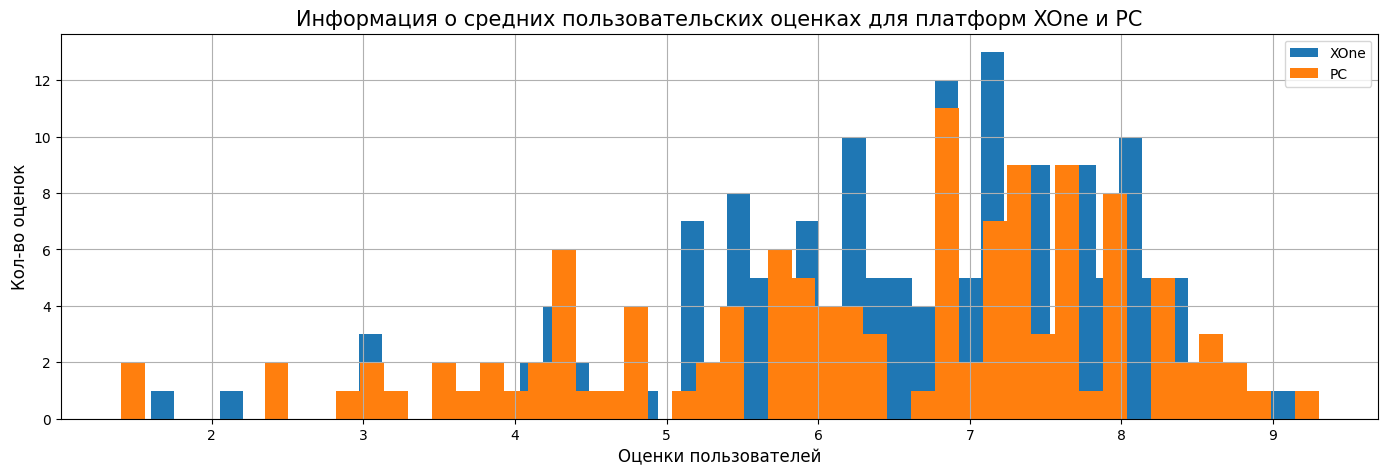

In [ ]:
#визуализация параметров
clr_data_platform.query('platform=="XOne"')['user_score'].hist(bins=50, figsize=(17,5), label="XOne")
clr_data_platform.query('platform=="PC"')['user_score'].hist(bins=50, figsize=(17,5), label="PC")
plt.title("Информация о средних пользовательских оценках для платформ XOne и PC",fontsize=15)

plt.xlabel("Оценки пользователей",fontsize=12)
plt.ylabel("Кол-во оценок",fontsize=12)
plt.legend()

plt.show()

Как видно по данным графика и анализа, пользовательские оценки по исследуемым платформам не сильно отличаются.

Нулевая гипотеза: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одиннаковые.  
Альтернативная гипотеза: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [ ]:
# задаём уровень значимости
alpha = 0.05

# пользовательские оценки платформы action
action_mean =clr_data_platform.query('genre=="Action"')['user_score']
action_mean = action_mean.dropna().reset_index(drop=True)

# пользовательские оценки платформы sports
sports_mean = clr_data_platform.query('genre=="Sports"')['user_score']
sports_mean = sports_mean.dropna().reset_index(drop=True)

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу
results = st.ttest_ind(action_mean, sports_mean,  equal_var=False, alternative='two-sided')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


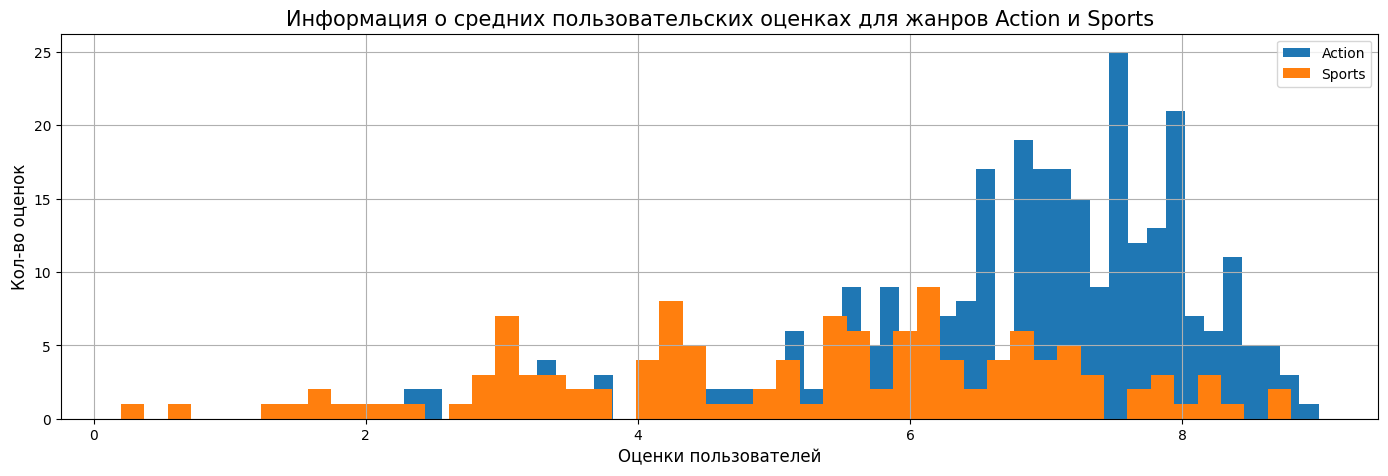

In [ ]:
#визуализация параметров
clr_data_platform.query('genre=="Action"')['user_score'].hist(bins=50, figsize=(17,5), label="Action")
clr_data_platform.query('genre=="Sports"')['user_score'].hist(bins=50, figsize=(17,5), label="Sports")
plt.title("Информация о средних пользовательских оценках для жанров Action и Sports",fontsize=15)

plt.xlabel("Оценки пользователей",fontsize=12)
plt.ylabel("Кол-во оценок",fontsize=12)
plt.legend()

plt.show()

Как видно по данным графика и анализа, пользовательские оценки по исследуемым жанрам сильно отличаются: оценки по жанру Actions значительно выше Sports.

## Шаг 6. Напишите общий вывод

Объемы продаж и выпуска игр практически индентичны.При этом пиковые значения приходятся на 2008-2009гг. Однако уже после 2011 г. показатели и продаж и выпуска резко снижаются, и показатель по продажам в 2016 г. приближается к уровням периода до 2000г. Возможно предположить, что на это повлияли разработки облачных решений, которые позволили игрокам отказаться от покупки физических дисков в пользу покупки покупки интернет-версии игры и игры посредством скачиваемого файла.  
Очевидными лидерами по продажам игр, оказались PS (с пиком в 1998 г.), PS2 (пик в 2004 г.), Wii (пик в 2009 г.), X360 (пик в 2010 г.), PS3 (пик в 2011 г.) и PS4 (2015 г.) В целом, результаты совпадают с показателями предыдущего графика, иллюстрирующего суммарные продажи по всем годам). При этом разрывы, пики и "рваные" графики показывают явное наличие жизненных циклов платформ. Представленные данные иллюстрируют прежде всего, что данные сильно подтверждены фактору жизненного цикла платформ, которое, как предполагается, составляет 6 лет, помимо тех платформ, которые "не отживают" а пролонгируют ЖЦ посредством совершенствования технических свойств, например, PC.  
На суммарные продажи игр сильно влияет количество выпусков таких игр, а также выпуск "хитов". При этом было выявлено, при анализе суммарных и медианных показателей продаж, что наиболее популярными жанрами являются Action и Shooter.
На продажи игр, на платформах X360,PS3, XOne и PS4, мнение критиков имеет небольшое прямопропорциональное влияние - чем выше оценка, тем вероятнее будут лучше продажи. При этом мнение пользователей не имеют никакого влияние на продажи.
Критики более высоко оценивали игры в отличие от пользователей. Вполне вероятно, на такие результаты влияют в первую очередь, что критики оценивают по конкретным критериям, т.е. на качество реализации продукта, а не исходя из своих личностных ощущений. Более того, очень вероятно на оценки в т.ч. влияет предрасположенность пользователей на покупку/игру в конкретный жанр, соответственно, оценок по тому или иному жанру больше и он более "качественнее" иллюстрирует отношение пользователей к продукту.
При анализе популярных платформ оказалось, что результаты в Северной Америке и Европе практически совпадают. Разительно отличаются картины в Японии. Самыми популярными платформами в Северной Америке оказались: X360, PS4, PS3, XOne и 3DS. В Европе ситуация аналогичная. Однако в Японии лидером (45% продаж игр) составила платформа 3DS, и на 2ом месте, с большим отставанием, PS3, далее PSV,PS4 и WiiU. Самый популярный жанр Action, на 2ом месте Shooter и на 3ем месте Sports в Сееверной Америке. Аналогично в Европе. В Японии на первом месте Role Playing, на 2ом Action, очевидного претнедента на 3 место нет, т.к. в целом остальные жанры "находятся" на одном уровне.
Самым популярным рейтингом в Северной Америке является рейтинг М, на 2ом - Е. В Европе аналогичная ситуация. При этом, необходимо учесть, что в каждом регионе существует свой рейтинг. В данном случае, оценивать данные показатели по Японии и Европе не является объективным. Более того, т.к. рейтинг ESRB является американским, то учитывать результаты графика следует применительно к результатам иллюстрирующие данные по Северной Америке. Данные в рейтинге, обозначенные как unknown, вероятно означают рейтинг, которые могли быть присвоены играм, если бы в данных были данные о рейтингах, которые используются в других регионах, возможно данные были бы точнее.  
Было выявлено, что пользовательские оценки по платформам XOne и PC не сильно отличаются. Пользовательские оценки по жанрам Actions и Sports отличаются: по первому жанру оценки сильно выше, чем по второму.  
При прогнозировании результатов на 2017 г. следует, вероятно, сделать упор на актуальные платформы, такие как PS4,XOne, PC и 3DS. Самыми популряными жанрами являются Action, Shooter и Sports. При этом рекомендации, могут сильно отличаться в зависимости от региона. Результаты анализа рейтинга следует учесть при условии, что этот рейтинг относится и/или содержит полные данные по стране, где данная игра производится/наиболее популярна.
